<a href="https://colab.research.google.com/github/girish3213/ISTE-ML-tasks/blob/main/Australia_weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df.shape

(145460, 23)

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df = df.drop(["Location", "Date"], axis =1)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.groupby('RainTomorrow').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainTomorrow,,,,,,,,,,,,,,,,
No,13.166611,24.765538,1.182149,5.758525,8.641254,39.224877,15.296343,19.384857,63.207306,44.714023,1018.175237,1015.637006,3.760075,3.779806,18.268420,23.377392
Yes,14.520286,22.285129,5.487302,4.599026,4.529597,46.727368,16.980204,21.209624,75.314959,66.905931,1013.926909,1011.816834,5.946729,6.261930,17.980309,20.348869


In [ ]:
df.dropna(axis = 0)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


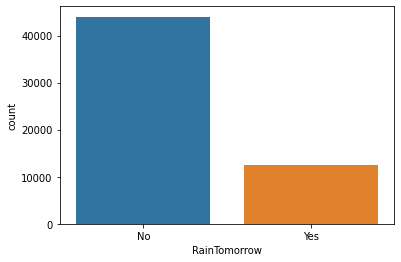

In [ ]:
sns.countplot(x='RainTomorrow', data=df)

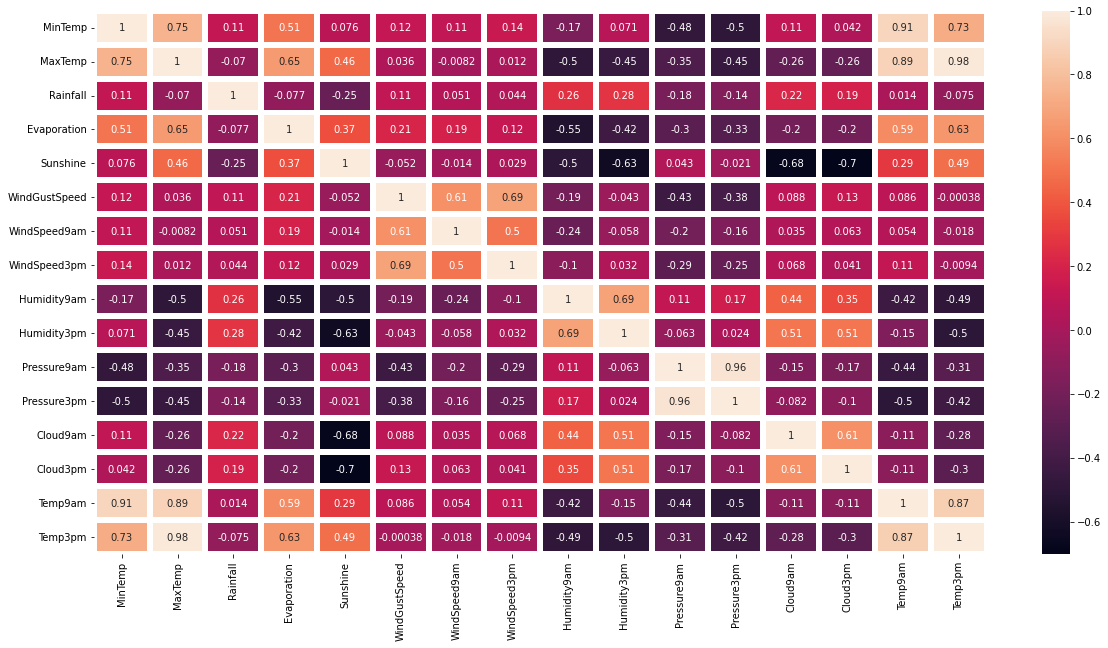

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True, linewidths = 5) 

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df1 = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp3pm','RainToday','RainTomorrow']]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MaxTemp        56420 non-null  float64
 1   Rainfall       56420 non-null  float64
 2   Evaporation    56420 non-null  float64
 3   Sunshine       56420 non-null  float64
 4   WindGustSpeed  56420 non-null  float64
 5   Humidity9am    56420 non-null  float64
 6   Humidity3pm    56420 non-null  float64
 7   Pressure9am    56420 non-null  float64
 8   Pressure3pm    56420 non-null  float64
 9   Cloud9am       56420 non-null  float64
 10  Cloud3pm       56420 non-null  float64
 11  Temp3pm        56420 non-null  float64
 12  RainToday      56420 non-null  object 
 13  RainTomorrow   56420 non-null  object 
dtypes: float64(12), object(2)
memory usage: 8.5+ MB


<Figure size 1440x720 with 0 Axes>

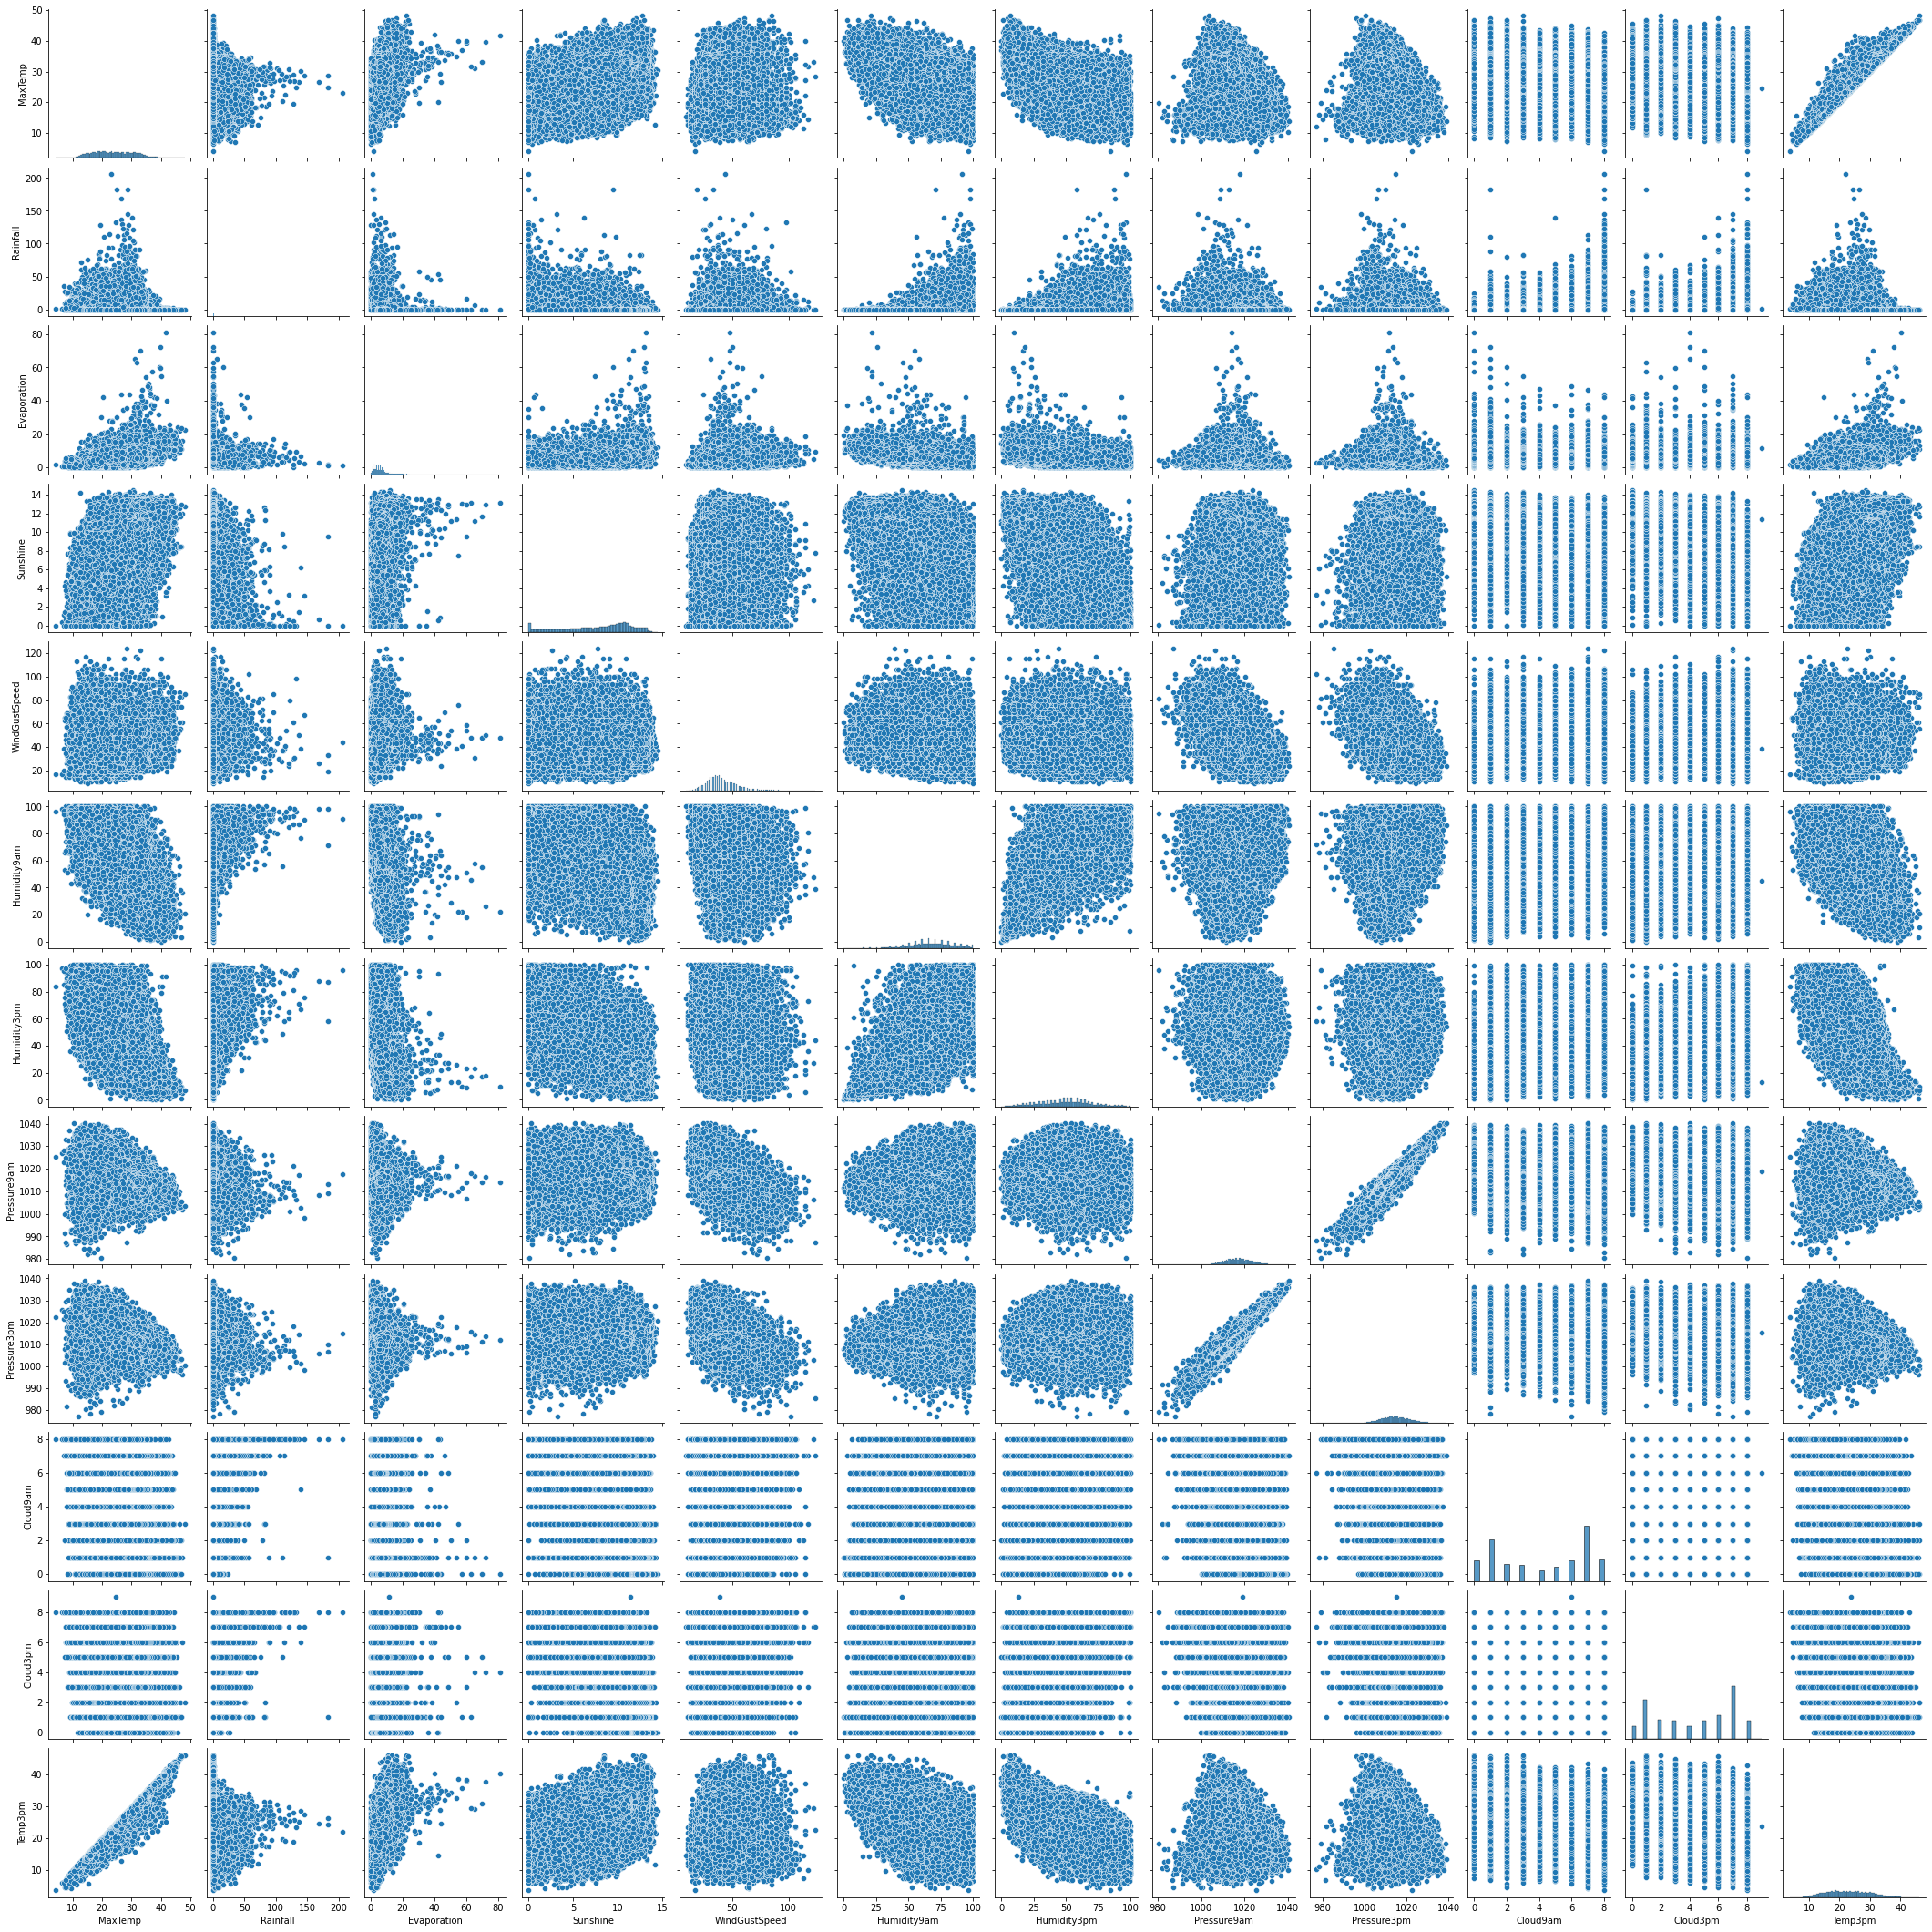

In [ ]:
plt.figure(figsize = (20,10))
sns.pairplot(df1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['RainToday'] = le.fit_transform(df['RainToday'])
df1['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df1.corr()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
MaxTemp,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.984841,-0.221810,-0.147467
Rainfall,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,-0.074627,0.550515,0.254342
Evaporation,0.650964,-0.077239,1.000000,0.369250,0.209566,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.630727,-0.218079,-0.130002
Sunshine,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.486129,-0.328904,-0.453407
WindGustSpeed,0.035531,0.106308,0.209566,-0.052422,1.000000,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,-0.000382,0.146276,0.233158
Humidity9am,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.487758,0.379451,0.271033
Humidity3pm,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.497245,0.385440,0.455358
Pressure9am,-0.350980,-0.180606,-0.297319,0.043330,-0.430363,0.114575,-0.063454,1.000000,0.961538,-0.150427,-0.166334,-0.310774,-0.186848,-0.254816
Pressure3pm,-0.451691,-0.137302,-0.325954,-0.020632,-0.383683,0.172972,0.024109,0.961538,1.000000,-0.081791,-0.103173,-0.421318,-0.104103,-0.230418
Cloud9am,-0.263634,0.217169,-0.199809,-0.677939,0.088129,0.438962,0.509223,-0.150427,-0.081791,1.000000,0.614380,-0.281213,0.297794,0.323972


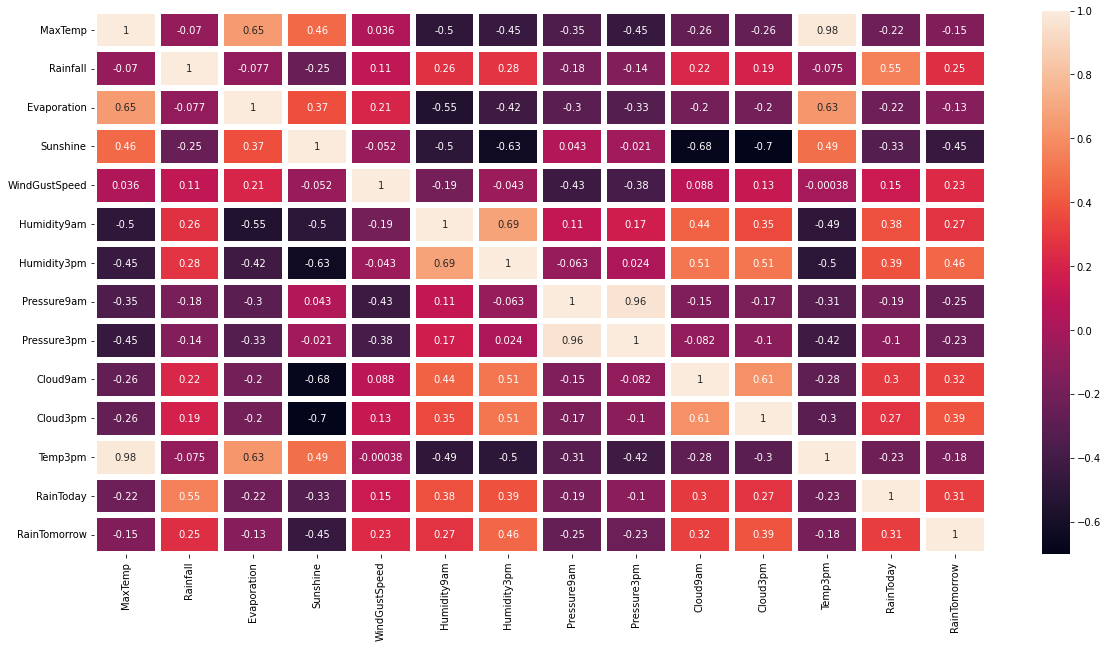

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(),annot=True, linewidths = 5) 

In [ ]:
X = df1.drop(['RainTomorrow'], axis = 1)
y = df1['RainTomorrow']

In [ ]:
X

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday
6049,35.2,0.0,12.0,12.3,48.0,20.0,13.0,1006.3,1004.4,2.0,5.0,33.4,0
6050,28.9,0.0,14.8,13.0,37.0,30.0,8.0,1012.9,1012.1,1.0,1.0,27.0,0
6052,37.6,0.0,10.8,10.6,46.0,42.0,22.0,1012.3,1009.2,1.0,6.0,34.9,0
6053,38.4,0.0,11.4,12.2,31.0,37.0,22.0,1012.7,1009.1,1.0,5.0,35.6,0
6054,41.0,0.0,11.2,8.4,35.0,19.0,15.0,1010.7,1007.4,1.0,6.0,37.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,33.4,0.0,6.0,11.0,35.0,63.0,32.0,1013.9,1010.5,0.0,1.0,32.3,0
142299,32.6,0.0,7.6,8.6,37.0,56.0,28.0,1014.6,1011.2,7.0,0.0,32.0,0
142300,32.8,0.0,5.6,11.0,33.0,46.0,23.0,1015.3,1011.8,0.0,0.0,32.1,0
142301,31.8,0.0,6.2,10.6,26.0,62.0,58.0,1014.9,1010.7,1.0,1.0,29.2,0


In [ ]:
y

6049      0
6050      0
6052      0
6053      0
6054      0
         ..
142298    0
142299    0
142300    0
142301    0
142302    0
Name: RainTomorrow, Length: 56420, dtype: int64

Logistic Regression:

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred1 = classifier.predict(X_test)

In [ ]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

103197    0
33303     0
136838    1
80964     0
34347     0
         ..
10233     1
37551     1
38646     0
42043     0
79115     0
Name: RainTomorrow, Length: 11284, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
cm = confusion_matrix(y_pred1,y_test)
cm

array([[8342, 1111],
       [ 512, 1319]])

In [ ]:
accuracy_score(y_pred1, y_test)

0.8561680255228642

In [ ]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      9453
           1       0.54      0.72      0.62      1831

    accuracy                           0.86     11284
   macro avg       0.74      0.80      0.77     11284
weighted avg       0.88      0.86      0.86     11284



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5 , metric="minkowski", p=2)
classifier.fit(X_train , y_train)

KNeighborsClassifier()

In [ ]:
y_pred2 = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
cm = confusion_matrix(y_pred2,y_test)
cm

array([[8201, 1109],
       [ 653, 1321]])

In [ ]:
accuracy_score(y_pred2, y_test)

0.8438496986884083

In [ ]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      9310
           1       0.54      0.67      0.60      1974

    accuracy                           0.84     11284
   macro avg       0.73      0.78      0.75     11284
weighted avg       0.86      0.84      0.85     11284



Kernel SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC( kernel = 'rbf' , random_state = 42)
classifier.fit(X_train , y_train)

SVC(random_state=42)

In [ ]:
y_pred3 = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
cm = confusion_matrix(y_pred3,y_test)
cm

array([[8638, 1511],
       [ 216,  919]])

In [ ]:
accuracy_score(y_pred3, y_test)

0.8469514356611131

In [ ]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10149
           1       0.38      0.81      0.52      1135

    accuracy                           0.85     11284
   macro avg       0.68      0.83      0.71     11284
weighted avg       0.92      0.85      0.87     11284



Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( n_estimators = 10 , criterion = 'entropy' , random_state = 42)
classifier.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
y_pred4 = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
cm = confusion_matrix(y_pred4,y_test)
cm

array([[8419, 1201],
       [ 435, 1229]])

In [ ]:
accuracy_score(y_pred4, y_test)

0.8550159517901453

In [ ]:
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      9620
           1       0.51      0.74      0.60      1664

    accuracy                           0.86     11284
   macro avg       0.73      0.81      0.76     11284
weighted avg       0.89      0.86      0.87     11284



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred5 = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
cm = confusion_matrix(y_pred5,y_test)
cm

array([[7692, 1058],
       [1162, 1372]])

In [ ]:
accuracy_score(y_pred5, y_test)

0.8032612548741581

In [ ]:
print(classification_report(y_pred5,y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      8750
           1       0.56      0.54      0.55      2534

    accuracy                           0.80     11284
   macro avg       0.72      0.71      0.71     11284
weighted avg       0.80      0.80      0.80     11284



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}
gbm = XGBClassifier(n_estimators=100)
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)
xgb_random.fit(X, y)
xgb_pred=xgb_random.predict(X_test)
# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)
print("accuracy=",accuracy_score(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters found:  {'n_estimators': 14, 'max_depth': 6, 'learning_rate': 0.45, 'colsample_bytree': 0.9}
Best accuracy found:  0.8495746189294575
accuracy= 0.8725629209500178
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      8854
           1       0.78      0.57      0.66      2430

    accuracy                           0.87     11284
   macro avg       0.83      0.76      0.79     11284
weighted avg       0.87      0.87      0.87     11284

